In [1]:
import pandas as pd
import re
import nltk
import numpy as np
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rawll\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('../reviews.csv')

In [4]:
df.loc[0,'reviews']

"Well, you'd better if you plan on sitting through this amateurish, bland, and pokey flick about a middle-aged widowed mom who has a little more in common with her young adult or old teen daughter than she would like. Set in Tunis, mom piddles around the flat, gets antsy, and decides, albeit reluctantly (she just can't help herself), to don the costume and dance in a local cabaret. Meanwhile her daughter is taking dancing lessons. The common denominator is a Tunisian band drummer. This film is so full of filler I watched the DVD at x2 and read the subtitles, fast forwarding through much of the very ordinary dancing and loooong shots of walking (they walk everywhere) and more walking and just plain dawdling at x4 just to get though this boring, uneventful, low budget flick which some how garnered some pretty good critical plaudits. Go figure. (C-)"

In [5]:
def tokenizer(text):
  text = re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
  text = re.sub('[\W]+', ' ', text.lower()) +\
      ' '.join(emoticons).replace('-', '')
  return text

def remStopwords(text):
    return [w for w in text.split() if w not in stop]

In [6]:
stop = stopwords.words('english')
def stream_docs(path):
  with open(path, 'r', encoding='utf-8') as csv:
      next(csv)  # skip header
      for line in csv:
          text, label = line[:-3], int(line[-2])
          yield text, label
            
def get_minibatch(doc_stream, size):
  docs, y = [], []
  try:
      for _ in range(size):
          text, label = next(doc_stream)
          docs.append(text)
          y.append(label)
  except StopIteration:
      return None, None
  return docs, y

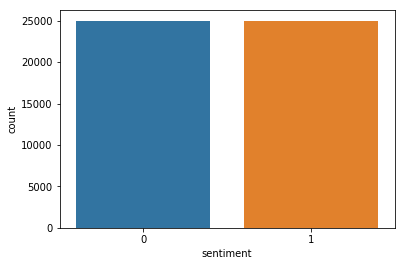

In [9]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [10]:
X = []
sentences = list(df['reviews'])
for sen in sentences:
    X.append(tokenizer(sen))

In [11]:
print(X[5])

of all the reviews i ve read most people have been exceedingly hard on alexandre neither marie or veronika ever seemed that they would particularly desperate to keep alexandre he being only slightly intelligent though not at all intellectual as most of us are however hard it may be for anyone to admit alexandre is getting away with life perfectly being totally taken care of getting and giving what he wants the girls are allowing this veronika loves sex marie is his patron is there anything wrong with any of this is anyone in love really i don t think so though french new wave cinema is prone to pretension and so on it is marvelous simply because of its lack of a need for a plot in order to create emotion ease is perfectly lovely and all anyone in alexandre s position in an urban area can ask for i m looking for a patron anyone interested 


In [12]:
df.loc[5, 'reviews']

"Of all the reviews I've read, most people have been exceedingly hard on Alexandre. Neither Marie or Veronika ever seemed that they would particularly desperate to keep Alexandre, he being only slightly intelligent though not at all intellectual, as most of us are, however hard it may be for anyone to admit. Alexandre is getting away with life perfectly, being totally taken care of, getting and giving what he wants. the girls are allowing this, veronika loves sex, marie is his patron. is there anything wrong with any of this? is anyone in love? really? i don't think so. Though French New Wave cinema is prone to pretension and so on, it is marvelous simply because of its lack of a need for a plot in order to create emotion. Ease is perfectly lovely and all anyone in Alexandre's position, in an urban area can ask for. I'm looking for a patron, anyone interested?"